In [2]:
import pandas as pd
import numpy as np

In [3]:
#load data
df=pd.read_csv("https://raw.githubusercontent.com/chirudukuru/DMDW/main/student-mat.csv")

In [5]:
df.shape

(395, 33)

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
#proxmity measures of binary attributes

In [8]:
df1=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]

In [9]:
df1.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [10]:
df1=df1.replace('no',0)
df1=df1.replace('yes',1)

In [11]:
df1.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [12]:
n=np.array(df1[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [13]:

m=np.array(df1[['internet','romantic']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [14]:
from scipy.spatial import distance
dist_matrix=distance.cdist(n,m)
print(dist_matrix)

[[1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

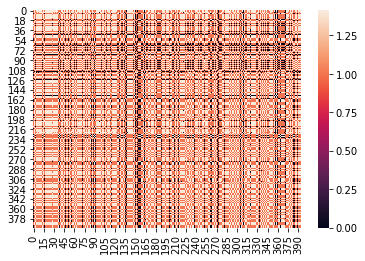

In [16]:
sns.heatmap(dist_matrix)
plt.show()

In [17]:
#nominal attribute

In [18]:

nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal['guardian']=lb.fit_transform(nominal['guardian'])

In [20]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [21]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [22]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[0.         2.23606798 2.82842712 ... 2.44948974 2.82842712 3.31662479]
 [2.23606798 0.         2.23606798 ... 2.23606798 2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         ... 2.44948974 2.82842712 2.64575131]
 ...
 [2.44948974 2.23606798 2.44948974 ... 0.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.82842712 ... 1.41421356 0.         1.73205081]
 [3.31662479 1.41421356 2.64575131 ... 2.23606798 1.73205081 0.        ]]


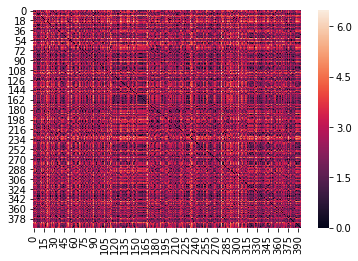

In [23]:
sns.heatmap(dist_matrix)
plt.show()

In [24]:

#Numeric Attributes

In [25]:
numeric=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numeric.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [26]:
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [27]:
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [28]:
from scipy.spatial import distance
dist_matrix=distance.cdist(num1,num2)
print(dist_matrix)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 15.29705854
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 13.
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 19.
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 17.2626765
  18.02775638]]


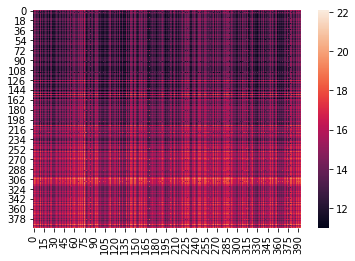

In [29]:

dist_matrix.shape
sns.heatmap(dist_matrix)